In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats
from pathlib import Path

In [2]:
# Showing my path for my files
os.getcwd()

'C:\\Users\\Ryan\\Desktop\\Ryan\\School\\MS_DataScience\\DSC680_Applied_Data_Science\\Project_7_Huskers'

In [35]:
# Reading in the csv file
df = pd.read_csv('C:\\Users\\Ryan\\Desktop\\Ryan\\School\\MS_DataScience\\DSC680_Applied_Data_Science\\Project_7_Huskers\\nebraska_boxscores_1962-2020.csv')
pd.set_option('display.max_columns', None)

# creating a total yards column for opp
sum_column = df['opp_rush_yards'] + df['opp_pass_yards']
df['opp_total_yards'] = sum_column

# creating a total yards column for ne
sum_column = df['ne_rush_yards'] + df['ne_pass_yards']
df['ne_total_yards'] = sum_column

# Showing the dataframe
df

,date,time,season,opp,site,conference,opp_score,ne_score,opp_rush_att,opp_rush_yards,ne_rush_att,ne_rush_yards,opp_pass_comp,opp_pass_att,opp_pass_yards,ne_pass_comp,ne_pass_att,ne_pass_yards,opp_int,opp_fum,ne_int,ne_fum,ne_pen_num,ne_pen_yards,spread,temp,humidity,wind_speed,wind_bearing,opp_total_yards,ne_total_yards
0,1962-09-22,2:00 PM,1962,South Dakota,home,False,0,53,42,89,42,313,4,8,14,11,17,142,1,0,0,3,-,65,-,66.7,0.66,6.9,90,103,455
1,1962-09-29,12:30 PM,1962,Michigan,away,False,13,25,43,170,49,222,8,21,83,8,15,119,0,3,0,2,-,65,-,62.7,0.43,17.9,293,253,341
2,1962-10-06,2:00 PM,1962,Iowa State,home,True,22,36,36,147,62,234,7,14,70,9,15,153,2,1,0,2,-,55,-,64.7,0.91,10.3,135,217,387
3,1962-10-13,2:00 PM,1962,North Carolina State,home,False,14,19,44,130,47,154,4,8,48,15,25,202,0,2,1,0,-,43,-,78.7,0.70,9.2,225,178,356
4,1962-10-20,2:00 PM,1962,Kansas State,home,True,6,26,26,38,61,317,7,22,156,6,15,87,0,3,3,2,-,45,-,56.8,0.53,9.2,0,194,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,2020-11-21,11:00 AM,2020,Illinois,home,True,41,23,52,285,44,215,18,25,205,18,30,177,0,0,3,2,7,66,-16.5,44.0,0.65,7.0,90,490,392
717,2020-11-27,12:00 PM,2020,Iowa,away,True,26,20,45,129,38,143,18,30,193,21,25,195,1,0,0,2,4,40,12.5,40.0,0.73,13.0,315,322,338
718,2020-12-05,11:00 AM,2020,Purdue,away,True,27,37,17,-2,40,111,33,47,334,24,31,253,0,0,0,0,9,107,1,41.0,0.62,5.0,338,332,364
719,2020-12-12,11:00 AM,2020,Minnesota,home,True,24,17,43,212,36,197,17,30,181,16,29,111,0,0,1,1,3,32,-9.5,30.0,0.79,18.0,0,393,308


In [14]:
# Seeing if my data will fit linear regression
# using ne data to see how many yards they need to reach a certain point total
# about 78% accuracy with score and total yards - not ideal

x = df['ne_score']
y = df['ne_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.7884892258128264


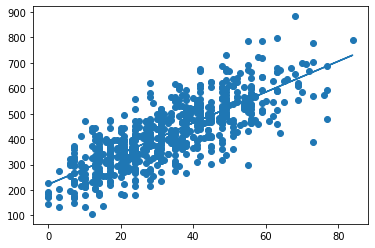

In [15]:
x = df['ne_score']
y = df['ne_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [25]:
# Predicting points based off of total yards

x = df['ne_score']
y = df['ne_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

# enter score prediciton
score = myfunc(62)

# output will be predicted total yards to reach score prediciton
print('Total yards needed to reach score prediction: ' +str(score))

Total yards needed to reach score prediction: 596.9691930991744


In [28]:
# Seeing if my data will fit linear regression
# using opp data to see what defense needs to hold teams to 
# about 80% accuracy with score and total yards - not ideal

x = df['opp_score']
y = df['opp_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.8076695376172704


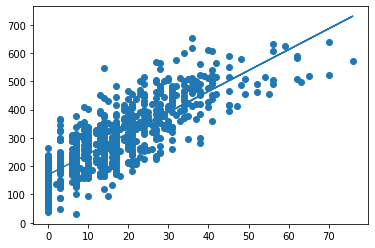

In [29]:
x = df['opp_score']
y = df['opp_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [30]:
# Predicting total number of yards defense can allow for certain point totals

x = df['opp_score']
y = df['opp_total_yards']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

# enter score prediciton
score = myfunc(21)

# output will be predicted total yards to reach score prediciton
print('Total yards defense can allow to hold opponent to certain score: ' +str(score))

Total yards defense can allow to hold opponent to certain score: 324.63468359567526
